In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Circadian 

### Microbiome

In [4]:
cIHC_metadata = pd.read_csv('../data/CircadianIHC/Microbiome/circadianIHC_metadata_cleaned.txt', 
                            sep='\t', usecols=['sample_name', 'mouse_number', 'exposure_type', 'zt'], index_col=0)
cIHC_metadata.head()

,zt,exposure_type,mouse_number
sample_name,,,
11548.132.133.1a,2,Air,133
11548.132.133.2a,6,Air,133
11548.132.133.3a,10,Air,133
11548.132.133.4a,14,Air,133
11548.132.133.5a,18,Air,133


In [5]:
cIHC_wUF_dm = pd.read_csv('../data/CircadianIHC/Microbiome/CircadianIHC-wUF-distance-matrix.tsv', sep='\t', index_col=0)
cIHC_wUF_dm.head()

,11548.A25.126.5a,11548.132.133.5a,11548.A31.132.3a,11548.A29.130.5a,11548.A26.127.1a,11548.A30.131.1a,11548.A26.127.4a,11548.A24.125.2a,11548.A30.131.4a,11548.A27.128.4a,...,11548.A29.130.2a,11548.132.133.2a,11548.A25.126.2a,11548.A31.132.4a,11548.A27.128.6a,11548.A31.132.1a,11548.A27.128.3a,11548.A24.125.5a,11548.A30.131.3a,11548.A26.127.3a
11548.A25.126.5a,0.000000,0.186538,0.162573,0.088567,0.195179,0.082325,0.237604,0.389104,0.225851,0.118308,...,0.200061,0.251013,0.400154,0.181158,0.133479,0.171033,0.265336,0.060691,0.179337,0.264867
11548.132.133.5a,0.186538,0.000000,0.290283,0.151622,0.273414,0.187325,0.232543,0.497539,0.217255,0.235590,...,0.298842,0.292213,0.553915,0.289385,0.246850,0.306645,0.379314,0.192049,0.229456,0.263488
11548.A31.132.3a,0.162573,0.290283,0.000000,0.188501,0.216317,0.144421,0.278983,0.268480,0.293638,0.159717,...,0.220587,0.277098,0.305191,0.193274,0.135367,0.153830,0.183007,0.153816,0.209320,0.302641
11548.A29.130.5a,0.088567,0.151622,0.188501,0.000000,0.230151,0.102221,0.281558,0.411411,0.268341,0.166035,...,0.221558,0.287728,0.460111,0.219659,0.181248,0.210376,0.313788,0.089823,0.220294,0.307873
11548.A26.127.1a,0.195179,0.273414,0.216317,0.230151,0.000000,0.190328,0.130493,0.344067,0.187042,0.102363,...,0.092766,0.101189,0.336149,0.104005,0.116928,0.101761,0.164898,0.199435,0.079025,0.097743


In [6]:
named_cIHC_wUF_dm = pd.merge(cIHC_metadata, cIHC_wUF_dm, left_index=True, right_index=True)
named_cIHC_wUF_dm.head()

,zt,exposure_type,mouse_number,11548.A25.126.5a,11548.132.133.5a,11548.A31.132.3a,11548.A29.130.5a,11548.A26.127.1a,11548.A30.131.1a,11548.A26.127.4a,...,11548.A29.130.2a,11548.132.133.2a,11548.A25.126.2a,11548.A31.132.4a,11548.A27.128.6a,11548.A31.132.1a,11548.A27.128.3a,11548.A24.125.5a,11548.A30.131.3a,11548.A26.127.3a
11548.132.133.1a,2,Air,133,0.185405,0.300808,0.181752,0.234090,0.097401,0.150599,0.182627,...,0.113321,0.111507,0.283330,0.126190,0.084263,0.071502,0.111656,0.178909,0.125272,0.167736
11548.132.133.2a,6,Air,133,0.251013,0.292213,0.277098,0.287728,0.101189,0.252780,0.134970,...,0.138290,0.000000,0.354980,0.143614,0.168714,0.140109,0.173667,0.265703,0.106789,0.101385
11548.132.133.3a,10,Air,133,0.379873,0.368507,0.419002,0.422368,0.236504,0.390581,0.186412,...,0.273839,0.149302,0.419538,0.276483,0.307994,0.282443,0.274546,0.401647,0.242048,0.163299
11548.132.133.5a,18,Air,133,0.186538,0.000000,0.290283,0.151622,0.273414,0.187325,0.232543,...,0.298842,0.292213,0.553915,0.289385,0.246850,0.306645,0.379314,0.192049,0.229456,0.263488
11548.132.133.6a,22,Air,133,0.136146,0.066865,0.249203,0.114118,0.223600,0.148203,0.216310,...,0.247375,0.241356,0.498926,0.248523,0.196332,0.257354,0.329154,0.146346,0.180246,0.241683


In [7]:
named_cIHC_wUF_dm['combined'] = named_cIHC_wUF_dm['exposure_type'].map(str) + "_" + named_cIHC_wUF_dm['zt'].map(str)
named_cIHC_wUF_dm.head()

,zt,exposure_type,mouse_number,11548.A25.126.5a,11548.132.133.5a,11548.A31.132.3a,11548.A29.130.5a,11548.A26.127.1a,11548.A30.131.1a,11548.A26.127.4a,...,11548.132.133.2a,11548.A25.126.2a,11548.A31.132.4a,11548.A27.128.6a,11548.A31.132.1a,11548.A27.128.3a,11548.A24.125.5a,11548.A30.131.3a,11548.A26.127.3a,combined
11548.132.133.1a,2,Air,133,0.185405,0.300808,0.181752,0.234090,0.097401,0.150599,0.182627,...,0.111507,0.283330,0.126190,0.084263,0.071502,0.111656,0.178909,0.125272,0.167736,Air_2
11548.132.133.2a,6,Air,133,0.251013,0.292213,0.277098,0.287728,0.101189,0.252780,0.134970,...,0.000000,0.354980,0.143614,0.168714,0.140109,0.173667,0.265703,0.106789,0.101385,Air_6
11548.132.133.3a,10,Air,133,0.379873,0.368507,0.419002,0.422368,0.236504,0.390581,0.186412,...,0.149302,0.419538,0.276483,0.307994,0.282443,0.274546,0.401647,0.242048,0.163299,Air_10
11548.132.133.5a,18,Air,133,0.186538,0.000000,0.290283,0.151622,0.273414,0.187325,0.232543,...,0.292213,0.553915,0.289385,0.246850,0.306645,0.379314,0.192049,0.229456,0.263488,Air_18
11548.132.133.6a,22,Air,133,0.136146,0.066865,0.249203,0.114118,0.223600,0.148203,0.216310,...,0.241356,0.498926,0.248523,0.196332,0.257354,0.329154,0.146346,0.180246,0.241683,Air_22


In [8]:
named_cIHC_wUF_dm.drop(columns=['zt', 'exposure_type', 'mouse_number'], inplace=True)

In [9]:
named2_cIHC_wUF_dm = named_cIHC_wUF_dm.set_index('combined')

In [10]:
Named_cIHC_wUF_dm = named_cIHC_wUF_dm[['combined']].copy()
Named_cIHC_wUF_dm.head()

,combined
11548.132.133.1a,Air_2
11548.132.133.2a,Air_6
11548.132.133.3a,Air_10
11548.132.133.5a,Air_18
11548.132.133.6a,Air_22


In [11]:
named3_cIHC_wUF_dm = pd.merge(named2_cIHC_wUF_dm.T, Named_cIHC_wUF_dm, left_index=True, right_index=True)
named4_cIHC_wUF_dm = named3_cIHC_wUF_dm.set_index('combined')
named4_cIHC_wUF_dm.head()

,Air_2,Air_6,Air_10,Air_18,Air_22,IHC_2,IHC_6,IHC_10,IHC_14,IHC_18,...,Air_10,Air_14,Air_18,Air_22,Air_2,Air_6,Air_10,Air_14,Air_18,Air_22
combined,,,,,,,,,,,,,,,,,,,,,
IHC_18,0.185405,0.251013,0.379873,0.186538,0.136146,0.403091,0.389104,0.401236,0.318104,0.060691,...,0.179337,0.225851,0.214889,0.153073,0.171033,0.285805,0.162573,0.181158,0.094661,0.122738
Air_18,0.300808,0.292213,0.368507,0.000000,0.066865,0.534982,0.497539,0.520239,0.444009,0.192049,...,0.229456,0.217255,0.091710,0.067915,0.306645,0.297965,0.290283,0.289385,0.119689,0.116674
Air_10,0.181752,0.277098,0.419002,0.290283,0.249203,0.301548,0.268480,0.374752,0.249547,0.153816,...,0.209320,0.293638,0.343959,0.261229,0.153830,0.305027,0.000000,0.193274,0.193972,0.217692
Air_18,0.234090,0.287728,0.422368,0.151622,0.114118,0.449117,0.411411,0.444303,0.367005,0.089823,...,0.220294,0.268341,0.209844,0.122378,0.210376,0.322943,0.188501,0.219659,0.075809,0.082278
IHC_2,0.097401,0.101189,0.236504,0.273414,0.223600,0.337405,0.344067,0.273851,0.210689,0.199435,...,0.079025,0.187042,0.292615,0.252328,0.101761,0.163037,0.216317,0.104005,0.217951,0.263113


In [10]:
named5_cIHC_wUF_dm = named4_cIHC_wUF_dm.filter(regex='IHC')
named6_cIHC_wUF_dm = named5_cIHC_wUF_dm.T.filter(regex='Air')
named6_cIHC_wUF_dm.head()

combined,Air_18,Air_10,Air_18,Air_2,Air_14,Air_22,Air_2,Air_2,Air_18,Air_6,...,Air_22,Air_10,Air_18,Air_10,Air_22,Air_6,Air_6,Air_14,Air_2,Air_10
IHC_2,0.534982,0.301548,0.449117,0.363408,0.463102,0.489722,0.291366,0.217494,0.555049,0.413724,...,0.482188,0.417136,0.470416,0.421997,0.504569,0.355988,0.357551,0.384200,0.306901,0.373913
IHC_6,0.497539,0.268480,0.411411,0.326278,0.459107,0.445204,0.297639,0.212407,0.548558,0.415900,...,0.454951,0.430414,0.438526,0.427685,0.472599,0.360201,0.362915,0.382619,0.308110,0.376895
IHC_10,0.520239,0.374752,0.444303,0.358633,0.378435,0.477884,0.239121,0.223169,0.535377,0.304161,...,0.468618,0.291990,0.459345,0.300086,0.493993,0.301587,0.254738,0.317353,0.265566,0.315811
IHC_14,0.444009,0.249547,0.367005,0.279708,0.357254,0.401645,0.164923,0.146079,0.456273,0.245150,...,0.390374,0.256953,0.381305,0.272877,0.418445,0.237194,0.209275,0.236868,0.198123,0.239273
IHC_18,0.192049,0.153816,0.089823,0.054580,0.247488,0.139329,0.178909,0.267624,0.232763,0.309736,...,0.146346,0.411812,0.117049,0.401647,0.153215,0.217224,0.265703,0.215872,0.176410,0.189452


In [11]:
mean_cIHC_wUF_dm = named6_cIHC_wUF_dm.groupby(level=0).mean()
mean_cIHC_wUF_dm = mean_cIHC_wUF_dm.reindex(index = ['IHC_2', 'IHC_6', 'IHC_10', 'IHC_14', 'IHC_18', 'IHC_22'])
mean2_cIHC_wUF_dm = mean_cIHC_wUF_dm.T.groupby(level=0).mean().sort_index(axis=0)
mean2_cIHC_wUF_dm = mean2_cIHC_wUF_dm.reindex(index = ['Air_2', 'Air_6', 'Air_10', 'Air_14', 'Air_18', 'Air_22'])
mean2_cIHC_wUF_dm

,IHC_2,IHC_6,IHC_10,IHC_14,IHC_18,IHC_22
combined,,,,,,
Air_2,0.254139,0.235631,0.201921,0.187067,0.193391,0.194304
Air_6,0.287012,0.310335,0.214767,0.179775,0.222351,0.160948
Air_10,0.321961,0.322564,0.258359,0.227371,0.271348,0.226893
Air_14,0.312947,0.338969,0.245236,0.201018,0.200152,0.167961
Air_18,0.432081,0.435809,0.361488,0.302092,0.154529,0.214960
Air_22,0.425808,0.426249,0.360775,0.302607,0.153481,0.214238


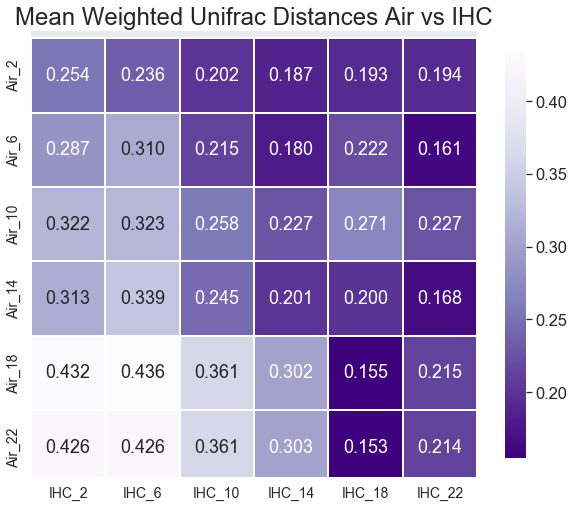

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(mean2_cIHC_wUF_dm, cmap='Purples_r', linewidths=1, cbar_kws={"shrink": 0.75},
            annot=True, fmt = '.3f', vmin=0.155, vmax=0.435, square=True)
sns.set(font_scale=1.5)
#plt.tight_layout()
plt.xlabel("")
plt.xticks(ha="center")
plt.ylabel("")
plt.yticks(va="center")
ax.set_ylim(len(mean2_cIHC_wUF_dm)-0.1, -0.1) #only until matplotlib 3.1.2 comes out
ax.set_title("Mean Weighted Unifrac Distances Air vs IHC", size=24)
ax.tick_params(labelsize=14)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/cIHC_wUF_mean_heatmap.svg', dpi=300, bbox_inches="tight")

### Metabolome

In [20]:
cIHC_c_metadata = cIHC_metadata = pd.read_csv('../data/CircadianIHC/Metabolome/cIHC_metab_metadata_cleaned.txt', 
                            sep='\t', usecols=['sample-id', 'mouse_number', 'exposure_type', 'zt'], index_col=0)
cIHC_c_metadata.head()

,zt,exposure_type,mouse_number
sample-id,,,
A32_133_1B,2.0,Air,133.0
A32_133_2B,6.0,Air,133.0
A32_133_3B,10.0,Air,133.0
A32_133_4B,14.0,Air,133.0
A32_133_5B,18.0,Air,133.0


In [21]:
cIHC_canberra_dm = pd.read_csv('../data/CircadianIHC/Metabolome/cIHC_unannotated_rawcounts_noblanks_canberra_dm.tsv', sep='\t', index_col=0)
cIHC_canberra_dm.head()

,A25_126_3B,A24_125_2B,A24_125_4B,A25_126_2B,A25_126_1B,A24_125_5B,A26_127_2B,A25_126_4B,A24_125_6B,A26_127_3B,...,A30_131_5B,A31_132_6B,A31_132_1B,A31_132_3B,A32_133_1B,A32_133_4B,A32_133_2B,A32_133_6B,A32_133_5B,A30_131_6B
A25_126_3B,0.000000,309.882048,320.060550,247.082919,295.508842,300.207034,238.097224,266.858428,287.813680,273.754273,...,331.539187,312.095465,309.769637,316.984967,307.847119,315.170499,293.630935,315.382883,331.137166,352.069883
A24_125_2B,309.882048,0.000000,285.573287,341.048974,349.040979,295.727991,319.394587,306.035326,310.810125,296.429088,...,346.096000,298.564973,327.936594,315.935883,339.949784,318.612122,308.987360,327.337138,327.996324,349.257483
A24_125_4B,320.060550,285.573287,0.000000,315.871396,275.884209,239.406688,304.590116,353.598551,245.082118,324.891400,...,297.128291,292.664465,272.899982,263.293118,286.119584,287.456434,277.514491,292.088089,289.388986,319.579198
A25_126_2B,247.082919,341.048974,315.871396,0.000000,247.866773,277.224674,243.306678,311.056067,294.208076,304.438334,...,321.278363,321.136270,290.817385,290.832778,295.461527,306.706828,296.561460,316.203991,337.522714,331.193080
A25_126_1B,295.508842,349.040979,275.884209,247.866773,0.000000,263.780142,278.719156,348.412468,263.376684,332.232899,...,315.106619,317.666029,261.462262,297.516410,268.380419,303.762269,297.337805,306.127578,315.194042,311.821815


In [22]:
named_cIHC_canberra_dm = pd.merge(cIHC_c_metadata, cIHC_canberra_dm, left_index=True, right_index=True)
named_cIHC_canberra_dm.head()

,zt,exposure_type,mouse_number,A25_126_3B,A24_125_2B,A24_125_4B,A25_126_2B,A25_126_1B,A24_125_5B,A26_127_2B,...,A30_131_5B,A31_132_6B,A31_132_1B,A31_132_3B,A32_133_1B,A32_133_4B,A32_133_2B,A32_133_6B,A32_133_5B,A30_131_6B
A32_133_1B,2.0,Air,133.0,307.847119,339.949784,286.119584,295.461527,268.380419,283.265401,290.261108,...,253.362497,256.339597,252.037914,249.026785,0.000000,243.398950,234.224902,235.789412,238.431133,280.190327
A32_133_2B,6.0,Air,133.0,293.630935,308.987360,277.514491,296.561460,297.337805,283.418906,278.644680,...,268.606221,254.750551,256.583523,246.476025,234.224902,222.077574,0.000000,244.141996,261.833500,310.571470
A32_133_3B,10.0,Air,133.0,305.449228,282.165757,318.039598,337.761768,341.058734,328.449146,306.122344,...,287.175276,277.048728,320.194733,303.423740,314.007698,257.994843,272.855952,296.740486,278.773512,347.331308
A32_133_4B,14.0,Air,133.0,315.170499,318.612122,287.456434,306.706828,303.762269,298.289788,280.331520,...,242.943827,259.554488,266.821825,253.726660,243.398950,0.000000,222.077574,220.047209,224.445768,298.085850
A32_133_5B,18.0,Air,133.0,331.137166,327.996324,289.388986,337.522714,315.194042,291.496486,303.267847,...,228.315399,272.905169,278.594242,268.362991,238.431133,224.445768,261.833500,217.071587,0.000000,274.975291


In [23]:
named_cIHC_canberra_dm['combined'] = named_cIHC_canberra_dm['exposure_type'].map(str) + "_" + named_cIHC_canberra_dm['zt'].map(str)
named_cIHC_canberra_dm.head()

,zt,exposure_type,mouse_number,A25_126_3B,A24_125_2B,A24_125_4B,A25_126_2B,A25_126_1B,A24_125_5B,A26_127_2B,...,A31_132_6B,A31_132_1B,A31_132_3B,A32_133_1B,A32_133_4B,A32_133_2B,A32_133_6B,A32_133_5B,A30_131_6B,combined
A32_133_1B,2.0,Air,133.0,307.847119,339.949784,286.119584,295.461527,268.380419,283.265401,290.261108,...,256.339597,252.037914,249.026785,0.000000,243.398950,234.224902,235.789412,238.431133,280.190327,Air_2.0
A32_133_2B,6.0,Air,133.0,293.630935,308.987360,277.514491,296.561460,297.337805,283.418906,278.644680,...,254.750551,256.583523,246.476025,234.224902,222.077574,0.000000,244.141996,261.833500,310.571470,Air_6.0
A32_133_3B,10.0,Air,133.0,305.449228,282.165757,318.039598,337.761768,341.058734,328.449146,306.122344,...,277.048728,320.194733,303.423740,314.007698,257.994843,272.855952,296.740486,278.773512,347.331308,Air_10.0
A32_133_4B,14.0,Air,133.0,315.170499,318.612122,287.456434,306.706828,303.762269,298.289788,280.331520,...,259.554488,266.821825,253.726660,243.398950,0.000000,222.077574,220.047209,224.445768,298.085850,Air_14.0
A32_133_5B,18.0,Air,133.0,331.137166,327.996324,289.388986,337.522714,315.194042,291.496486,303.267847,...,272.905169,278.594242,268.362991,238.431133,224.445768,261.833500,217.071587,0.000000,274.975291,Air_18.0


In [24]:
named_cIHC_canberra_dm.drop(columns=['zt', 'exposure_type', 'mouse_number'], inplace=True)

In [25]:
named2_cIHC_canberra_dm = named_cIHC_canberra_dm.set_index('combined')

In [26]:
Named_cIHC_canberra_dm = named_cIHC_canberra_dm[['combined']].copy()
Named_cIHC_canberra_dm.head()

,combined
A32_133_1B,Air_2.0
A32_133_2B,Air_6.0
A32_133_3B,Air_10.0
A32_133_4B,Air_14.0
A32_133_5B,Air_18.0


In [27]:
named3_cIHC_canberra_dm = pd.merge(named2_cIHC_canberra_dm.T, Named_cIHC_canberra_dm, left_index=True, right_index=True)
named4_cIHC_canberra_dm = named3_cIHC_canberra_dm.set_index('combined')
named4_cIHC_canberra_dm.head()

,Air_2.0,Air_6.0,Air_10.0,Air_14.0,Air_18.0,Air_22.0,IHC_2.0,IHC_6.0,IHC_14.0,IHC_18.0,...,Air_6.0,Air_14.0,Air_18.0,Air_22.0,Air_2.0,Air_6.0,Air_10.0,Air_14.0,Air_18.0,Air_22.0
combined,,,,,,,,,,,,,,,,,,,,,
IHC_10.0,307.847119,293.630935,305.449228,315.170499,331.137166,315.382883,363.531485,309.882048,320.060550,300.207034,...,312.981838,304.526057,331.539187,352.069883,309.769637,306.691318,316.984967,332.035701,315.511021,312.095465
IHC_6.0,339.949784,308.987360,282.165757,318.612122,327.996324,327.337138,334.056057,0.000000,285.573287,295.727991,...,324.114745,303.814051,346.096000,349.257483,327.936594,293.384610,315.935883,310.563791,289.612825,298.564973
IHC_14.0,286.119584,277.514491,318.039598,287.456434,289.388986,292.088089,273.581545,285.573287,0.000000,239.406688,...,277.845298,288.235862,297.128291,319.579198,272.899982,276.034015,263.293118,273.295749,283.008181,292.664465
IHC_6.0,295.461527,296.561460,337.761768,306.706828,337.522714,316.203991,328.920149,341.048974,315.871396,277.224674,...,306.112800,316.219689,321.278363,331.193080,290.817385,299.684893,290.832778,323.689778,324.662444,321.136270
IHC_2.0,268.380419,297.337805,341.058734,303.762269,315.194042,306.127578,293.662713,349.040979,275.884209,263.780142,...,304.517680,309.432743,315.106619,311.821815,261.462262,300.822156,297.516410,304.317898,329.209873,317.666029


In [28]:
named5_cIHC_canberra_dm = named4_cIHC_canberra_dm.filter(regex='IHC')
named6_cIHC_canberra_dm = named5_cIHC_canberra_dm.T.filter(regex='Air')
named6_cIHC_canberra_dm.head()

combined,Air_2.0,Air_22.0,Air_10.0,Air_6.0,Air_2.0,Air_14.0,Air_6.0,Air_6.0,Air_18.0,Air_10.0,...,Air_18.0,Air_22.0,Air_2.0,Air_10.0,Air_2.0,Air_14.0,Air_6.0,Air_22.0,Air_18.0,Air_22.0
IHC_2.0,337.528341,383.515321,342.393576,365.660430,335.958222,344.681665,343.869546,332.426124,350.129447,370.969942,...,328.554427,350.357074,304.467653,314.213754,299.734054,335.240204,327.653248,308.172390,318.391576,304.157628
IHC_6.0,306.578282,309.623694,301.259212,305.721954,293.788260,303.814051,324.114745,293.384610,289.612825,282.165757,...,346.096000,298.564973,327.936594,315.935883,339.949784,318.612122,308.987360,327.337138,327.996324,349.257483
IHC_14.0,283.835145,315.700159,276.984546,303.271491,288.445090,288.235862,277.845298,276.034015,283.008181,318.039598,...,297.128291,292.664465,272.899982,263.293118,286.119584,287.456434,277.514491,292.088089,289.388986,319.579198
IHC_18.0,276.681960,318.769443,278.847349,291.459849,287.815622,295.029905,277.565021,268.694530,294.273044,328.449146,...,293.307265,302.377231,264.813291,267.032904,283.265401,298.289788,283.418906,290.033072,291.496486,312.894588
IHC_22.0,258.847429,310.032099,249.587935,276.195421,284.401943,266.380891,270.971012,258.140367,288.284808,311.620690,...,280.937680,284.730665,267.951274,277.879831,263.948209,288.691771,264.527633,292.349740,283.256971,315.849503


In [29]:
mean_cIHC_canberra_dm = named6_cIHC_canberra_dm.groupby(level=0).mean()
mean_cIHC_canberra_dm = mean_cIHC_canberra_dm.reindex(index = ['IHC_2.0', 'IHC_6.0', 'IHC_10.0', 'IHC_14.0', 'IHC_18.0', 'IHC_22.0'])
mean2_cIHC_canberra_dm = mean_cIHC_canberra_dm.T.groupby(level=0).mean().sort_index(axis=0)
mean2_cIHC_canberra_dm = mean2_cIHC_canberra_dm.reindex(index = ['Air_2.0', 'Air_6.0', 'Air_10.0', 'Air_14.0', 'Air_18.0', 'Air_22.0'])
mean2_cIHC_canberra_dm

,IHC_2.0,IHC_6.0,IHC_10.0,IHC_14.0,IHC_18.0,IHC_22.0
combined,,,,,,
Air_2.0,285.176332,285.695747,294.277788,287.953376,282.815701,272.297416
Air_6.0,307.742436,290.915425,290.134210,287.761822,285.550446,282.786980
Air_10.0,316.313376,293.239333,286.838228,291.358964,297.424690,293.072596
Air_14.0,308.007008,299.942389,299.925864,290.799560,285.739730,284.240012
Air_18.0,309.742607,307.928336,312.676117,301.608391,285.591491,293.909567
Air_22.0,314.437091,310.889283,313.789778,306.626628,297.152010,292.965823


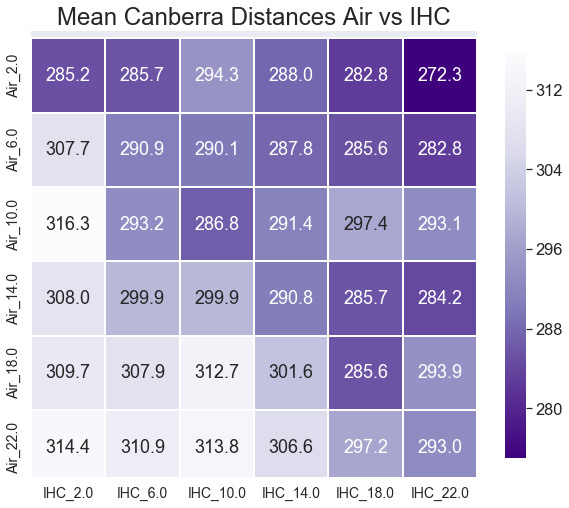

In [31]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(mean2_cIHC_canberra_dm, cmap='Purples_r', linewidths=1, cbar_kws={"shrink": 0.75},
            annot=True, fmt = '.1f', vmin=275, vmax=316, square=True)
sns.set(font_scale=1.5)
#plt.tight_layout()
plt.xlabel("")
plt.xticks(ha="center")
plt.ylabel("")
plt.yticks(va="center")
ax.set_ylim(len(mean2_cIHC_canberra_dm)-0.1, -0.1) #only until matplotlib 3.1.2 comes out
ax.set_title("Mean Canberra Distances Air vs IHC", size=24)
ax.tick_params(labelsize=14)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/cIHC_canberra_mean_heatmap.svg', dpi=300, bbox_inches="tight")